In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf) # print all numpy values
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, MultiLabelBinarizer

In [2]:
# 데이터 준비

# 코드 사전 정의
city2idx = {
    '강원':0, '경기':1, '경남':2, '경북':3, '광주':4, '대구':5, '대전':6, '부산':7, '서울':8, 
    '세종':9, '울산':10, '인천':11, '전남':12, '전북':13, '제주':14, '충남':15, '충북':16
}

idx2city = {
    0:'강원', 1:'경기', 2:'경남', 3:'경북', 4:'광주', 5:'대구', 6:'대전', 7:'부산', 8:'서울', 
    9:'세종', 10:'울산', 11:'인천', 12:'전남', 13:'전북', 14:'제주', 15:'충남', 16:'충북' 
}

In [3]:
# read columns
dataset = pd.read_csv(
    './samsung_dataset/dataset_kor/교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv', 
    encoding='cp949', 
    usecols=['사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '발생지시도']
)

In [4]:
# DataFrame을 이용하여 원하는 컬럼만 불러오기
dataset_df = pd.DataFrame(dataset, columns = ['사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '발생지시도'])

In [5]:
# pandas's datagram to numpy's array
dataset_arr = dataset_df.values
# print(dataset_arr)

In [6]:
# convert city to index 
encoded_city = []
for i in range (len(dataset_arr)):
    city = dataset_arr[i:i+1, 5:6][0]
    encoded_city = np.append(encoded_city, city2idx[''.join(city)])

# how to convert city2idx
# city2idx[''.join(df[1:2, 5:6][0])] 

In [7]:
# reshape for concatenate
encoded_city = encoded_city.reshape((25037, 1))
dataset_arr = dataset_arr[:, :5]

# print(encoded_city)
# print(dataset_arr)
print(encoded_city.shape)
print(dataset_arr.shape)

(25037, 1)
(25037, 5)


In [8]:
# concatenate numeric data and encoded city data
new_dataset = np.concatenate((dataset_arr, encoded_city), axis=1)
print (new_dataset)

[[1 1 0 0 0 1.0]
 [4 1 2 1 0 12.0]
 [1 1 0 0 0 15.0]
 [1 1 0 0 0 5.0]
 [2 1 1 0 0 8.0]
 [1 1 0 0 0 4.0]
 [3 1 2 0 0 5.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 15.0]
 [2 1 0 1 0 12.0]
 [1 1 0 0 0 4.0]
 [1 1 0 0 0 7.0]
 [1 1 0 0 0 16.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 0.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 15.0]
 [1 1 0 0 0 4.0]
 [3 1 2 0 0 2.0]
 [8 1 0 7 0 1.0]
 [2 1 1 0 0 12.0]
 [1 1 0 0 0 8.0]
 [2 1 1 0 0 1.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 7.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 8.0]
 [2 1 0 1 0 8.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 1.0]
 [2 1 0 1 0 8.0]
 [1 1 0 0 0 7.0]
 [5 1 1 3 0 15.0]
 [3 1 0 2 0 11.0]
 [3 1 1 1 0 12.0]
 [1 1 0 0 0 16.0]
 [3 1 2 0 0 9.0]
 [1 1 0 0 0 0.0]
 [2 1 1 0 0 1.0]
 [1 1 0 0 0 3.0]
 [2 1 1 0 0 16.0]
 [1 1 0 0 0 8.0]
 [1 1 0 0 0 15.0]
 [2 1 0 1 0 2.0]
 [3 1 0 2 0 3.0]
 [2 1 0 1 0 1.0]
 [1 1 0 0 0 2.0]
 [1 1 0 0 0 15.0]
 [1 1 0 0 0 11.0]
 [3 1 0 2 0 13.0]
 [4 1 0 3 0 6.0]
 [1 1 0 0 0 12.0]
 [1 1 0 0 0 1.0]
 [1 1 0 0 0 2.0]
 [1 1 0 0 0 2.0]
 [4 1 2 1 0 3.0]
 [1 1 0 0 0 7.0]
 [1 1 0 0 0 0.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# 랜덤 시드 고정
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

Using TensorFlow backend.


In [10]:
# 1. 데이터 준비
x_train = new_dataset[:21000, :5]
y_train = new_dataset[:21000, 5]
x_test = new_dataset[21000:, :5]
y_test = new_dataset[21000:, 5]
# print (x_train)
# print (y_train)

In [11]:
# 라벨 값에 대한 one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
print(y_train)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.

In [20]:
print(x_train, y_train)

[[1 1 0 0 0]
 [4 1 2 1 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [3 1 2 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 0 1 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [3 1 2 0 0]
 [8 1 0 7 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 0 1 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 0 1 0]
 [1 1 0 0 0]
 [5 1 1 3 0]
 [3 1 0 2 0]
 [3 1 1 1 0]
 [1 1 0 0 0]
 [3 1 2 0 0]
 [1 1 0 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 0 1 0]
 [3 1 0 2 0]
 [2 1 0 1 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [3 1 0 2 0]
 [4 1 0 3 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [4 1 2 1 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [4 1 1 2 0]
 [3 2 1 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [2 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [3 1 2 0 0]
 [2 1 0 1 0]

 [1 1 0 0 0]] [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 

In [12]:
one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  17


In [13]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [14]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [15]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=10, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/10
 - 8s - loss: 2.5992 - acc: 0.1865
Epoch 2/10
 - 5s - loss: 2.5870 - acc: 0.1876
Epoch 3/10
 - 5s - loss: 2.5832 - acc: 0.1874
Epoch 4/10
 - 5s - loss: 2.5811 - acc: 0.1879
Epoch 5/10
 - 5s - loss: 2.5797 - acc: 0.1878
Epoch 6/10
 - 5s - loss: 2.5791 - acc: 0.1879
Epoch 7/10
 - 5s - loss: 2.5790 - acc: 0.1879
Epoch 8/10
 - 5s - loss: 2.5788 - acc: 0.1879
Epoch 9/10
 - 5s - loss: 2.5775 - acc: 0.1880
Epoch 10/10
 - 5s - loss: 2.5771 - acc: 0.1878


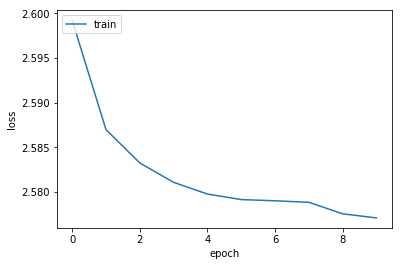

In [16]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

21000/21000 [==============================] - 1s 45us/step
acc: 18.79%


In [24]:
# 8. 모델 사용하기

pred_count = 50

# 사고 지역 예측
seq_in_1 = np.array([[1, 1, 0, 0, 0]])
seq_in_2 = np.array([[1, 4, 2, 1, 0]])
seq_in_3 = np.array([[1, 7, 0, 6, 0]])
seq_out_1 = '경기'
seq_out_2 = '전남'
seq_out = []

pred_out = model.predict(seq_in_3, batch_size=None, verbose=0, steps=None)
print(pred_out)

# idx = np.argmax(pred_out)
# seq_out.append(idx2city[idx])
# print(seq_out)

# for i in range(pred_count):
#     pred_out = model.predict(new_dataset[i:i+1, :5], batch_size=None, verbose=0, steps=None)
#     idx = np.argmax(pred_out)
#     seq_out.append(idx2city[idx])
# print(seq_out)

[[6.2782295e-02 4.0487987e-01 2.7260955e-02 7.7072926e-02 1.2235793e-02
  1.6627205e-03 1.4970972e-03 2.7230699e-03 1.7680379e-02 2.5840765e-05
  4.2039696e-03 1.0889908e-02 1.5277016e-01 8.1719562e-02 1.8137022e-03
  9.8233551e-02 4.2548232e-02]]


# 이언이 코드 따라해보기

In [ ]:
category = ['주야', '요일', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '법규위반', 
            '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류']

# read numeric columns
x_train_num = pd.read_csv(
    './samsung_dataset/dataset_kor/교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv', 
    encoding='cp949', 
    usecols=['사상자수', '사망자수', '중상자수', '경상자수','부상신고자수']
)

# read category columns
x_train_cat = pd.read_csv(
    './samsung_dataset/dataset_kor/교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv',
    encoding='cp949',
    usecols=category
)

In [12]:
pd.options.display.max_columns = None
x_train_cat = pd.get_dummies(data=x_train_cat, columns=category)

In [13]:
# show categories and data categories(horizontal)
print(x_train_cat)

# show categories and data categories(vertical)
# for col in x_train_cat.columns:
#     print(col)

       주야_야간  주야_주간  요일_금  요일_목  요일_수  요일_월  요일_일  요일_토  요일_화  발생지시도_강원  \
0          1      0     1     0     0     0     0     0     0         0   
1          1      0     1     0     0     0     0     0     0         0   
2          1      0     1     0     0     0     0     0     0         0   
3          1      0     1     0     0     0     0     0     0         0   
4          0      1     1     0     0     0     0     0     0         0   
5          0      1     1     0     0     0     0     0     0         0   
6          0      1     1     0     0     0     0     0     0         0   
7          0      1     1     0     0     0     0     0     0         0   
8          0      1     1     0     0     0     0     0     0         0   
9          1      0     1     0     0     0     0     0     0         0   
10         1      0     1     0     0     0     0     0     0         0   
11         1      0     1     0     0     0     0     0     0         0   
12         1      0     1